## Time Series on Comp Stock	

In [1]:
# Load the Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Data
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [4]:
# Preparing 3 indivuals  Time Series Models
# This is for Gold Investments
Comp_Data=pd.DataFrame(df[['Date','Comp Stock']])

In [5]:
# Info of the Data
Comp_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1984 non-null   object 
 1   Comp Stock  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [6]:
#Check the Null values
Comp_Data.isnull().sum()

Date          0
Comp Stock    0
dtype: int64

In [7]:
#Convert the Date 
Comp_Data['Date'] = pd.to_datetime(Comp_Data['Date'], dayfirst=True).dt.date

In [8]:
#Get the Year from the Date
Comp_Data['myear'] =  pd.to_datetime(Comp_Data['Date']).dt.year

In [9]:
#Analyis the Last 3 years data 
Comp_Data=Comp_Data[Comp_Data['myear']>2012]

In [10]:
#Get the Month Year from the Date
Comp_Data['month_year'] =  pd.to_datetime(Comp_Data['Date']).dt.to_period('M')

In [11]:
#Get the unique Month Year from the Date
Comp_Data['month_year'].unique()

<PeriodArray>
['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07',
 '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
 '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
 '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
 '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
 '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
 '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
 '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
 '2017-09', '2017-10', '2017-11']
Length: 59, dtype: period[M]

In [12]:
#Drop the myear column
Comp_Data.drop('myear',axis=1,inplace=True)
# Date

In [13]:
#Drop the Date column
Comp_Data.drop('Date',axis=1,inplace=True)

In [14]:
# aggerate (group by ) the OilInvestments by Year,Month
Comp_invest=Comp_Data.groupby(Comp_Data['month_year'], as_index=False).agg({"Comp Stock": "max"})
# data.groupby('month', as_index=False).agg({"duration": "sum"})

In [15]:
Comp_invest.head()

,month_year,Comp Stock
0,2013-01,0.041509
1,2013-02,0.035088
2,2013-03,0.027183
3,2013-04,0.030968
4,2013-05,0.023845


In [16]:
# oilData=oil_invest

In [17]:
Comp_invest['month_year']=Comp_invest['month_year'].astype('period[D]')

# pd.Period(oil_invest['month_year'], freq='D')

In [18]:
Comp_invest['month_year']=Comp_invest['month_year'].dt.strftime('%Y-%m-%d')

In [19]:
Comp_invest.describe()

,Comp Stock
count,59.000000
mean,0.030495
std,0.015118
min,0.008723
25%,0.018636
50%,0.027165
75%,0.037748
max,0.081982


In [20]:

# IQR score technique to remove Outliers 
Q1 = Comp_invest.quantile(0.25)
Q3 = Comp_invest.quantile(0.75)
IQR = Q3 - Q1
print(Comp_invest.shape)
dfIQR = Comp_invest[~((Comp_invest < (Q1-1.5 * IQR)) |(Comp_invest > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

# Nearly 100 rows detected as outliers

(59, 2)


(58, 2)

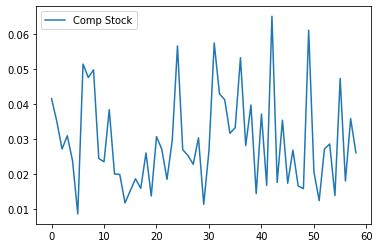

In [21]:
dfIQR.plot()

## check if data is stationary or not.

In [22]:

#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [23]:
adfuller_test(dfIQR['Comp Stock'])

ADF Test Statistic : -7.991215042479669
p-value : 2.4715775156873495e-12
#Lags Used : 0
Number of Observations Used : 57
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [24]:
CompData=dfIQR

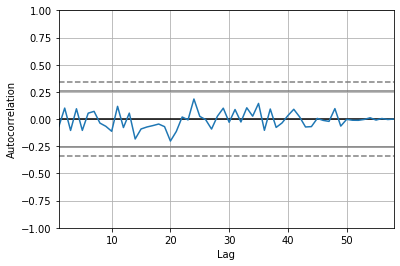

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(CompData['Comp Stock'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [27]:
CompData.set_index('month_year',inplace=True)

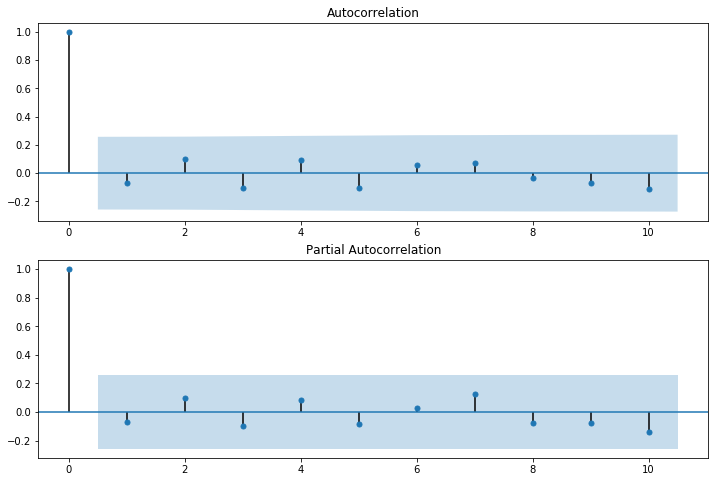

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(CompData['Comp Stock'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CompData['Comp Stock'],lags=10,ax=ax2)

In [29]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(CompData['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 162.110
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 23 Oct 2020   AIC                           -316.219
Time:                        05:39:04   BIC                           -308.047
Sample:                             1   HQIC                          -313.043
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.992e-05      0.000     -0.196      0.844      -0.000       0.000
ar.L1.D.Comp Stock    -0.0516      0.133     -0.388      0.698      -0.312       0.209
ma.L1.D.Comp Stock    -1.0000      0.060    -16.592      0.000      -1.118      -0.882
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -19.3832           +0.0000j           19.3832            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


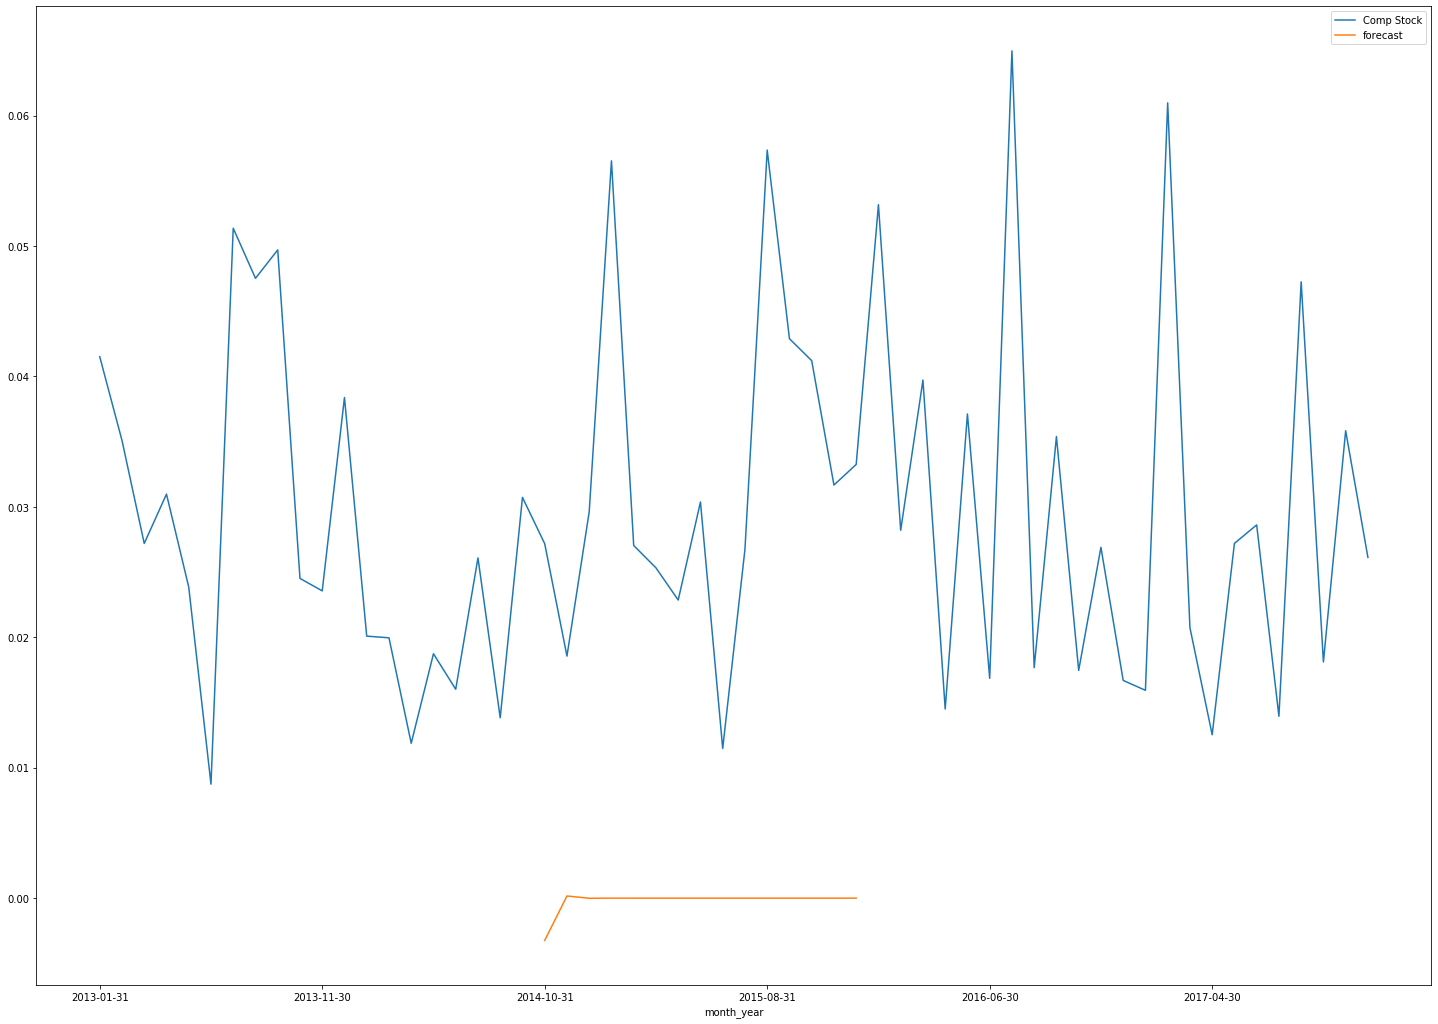

In [33]:
CompData['forecast']=model_fit.predict(start=20,end=34,dynamic=True)
CompData[['Comp Stock','forecast']].plot(figsize=(25,18))

In [34]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax (i.e, Every 12 months)

In [41]:
# (i.e, Every 12 months) seasonal_order
model=sm.tsa.statespace.SARIMAX(CompData['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


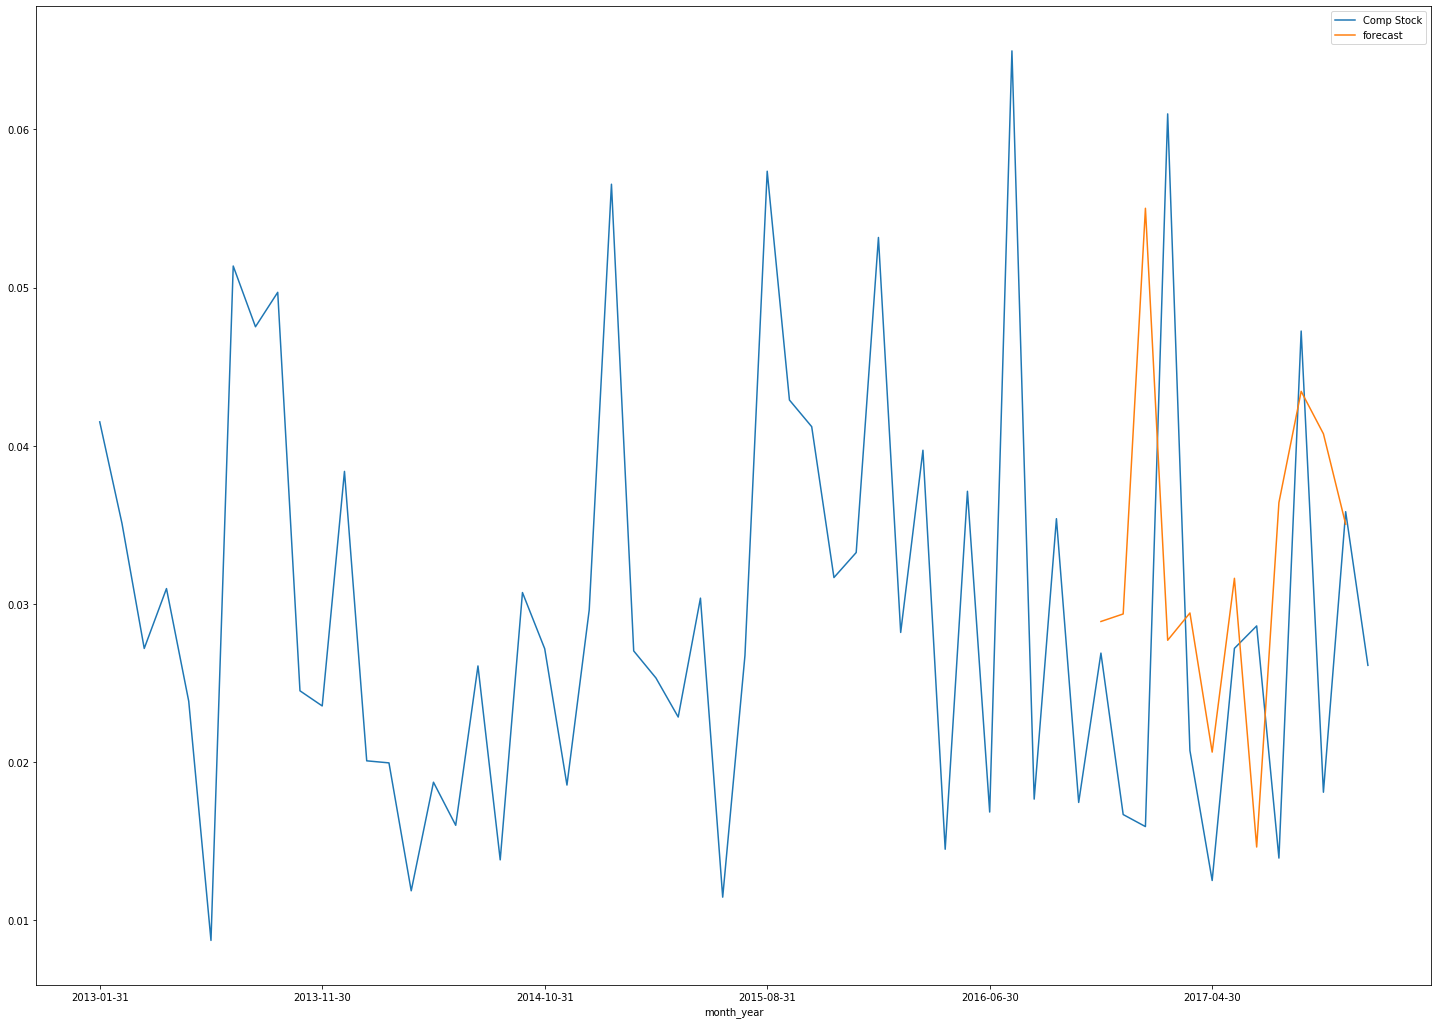

In [43]:
CompData['forecast']=results.predict(start=45,end=56,dynamic=True)
CompData[['Comp Stock','forecast']].plot(figsize=(25,18))

## Preparing the TestData

In [44]:
# Preparing the TestData
from pandas.tseries.offsets import DateOffset
future_dates=[pd.to_datetime(CompData.index[-1]).date()+DateOffset(months=x) for x in range(0,24)]


In [45]:
future_dates[0].date()

datetime.date(2017, 11, 30)

In [47]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=CompData.columns)

In [48]:
future_dateset_df

,Comp Stock,forecast
2017-12-30,NaN,NaN
2018-01-30,NaN,NaN
2018-02-28,NaN,NaN
2018-03-30,NaN,NaN
2018-04-30,NaN,NaN
2018-05-30,NaN,NaN
2018-06-30,NaN,NaN
2018-07-30,NaN,NaN
2018-08-30,NaN,NaN
2018-09-30,NaN,NaN


In [50]:
#Combine the Data
future_df=pd.concat([CompData,future_dateset_df])

In [51]:
future_df.reset_index(inplace=True)

In [52]:
future_df['index']=pd.to_datetime(future_df['index']).dt.date

In [53]:
future_df.set_index('index',inplace=True)

In [54]:
future_df.shape

(81, 2)

In [56]:
model=sm.tsa.statespace.SARIMAX(future_df['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
M_results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


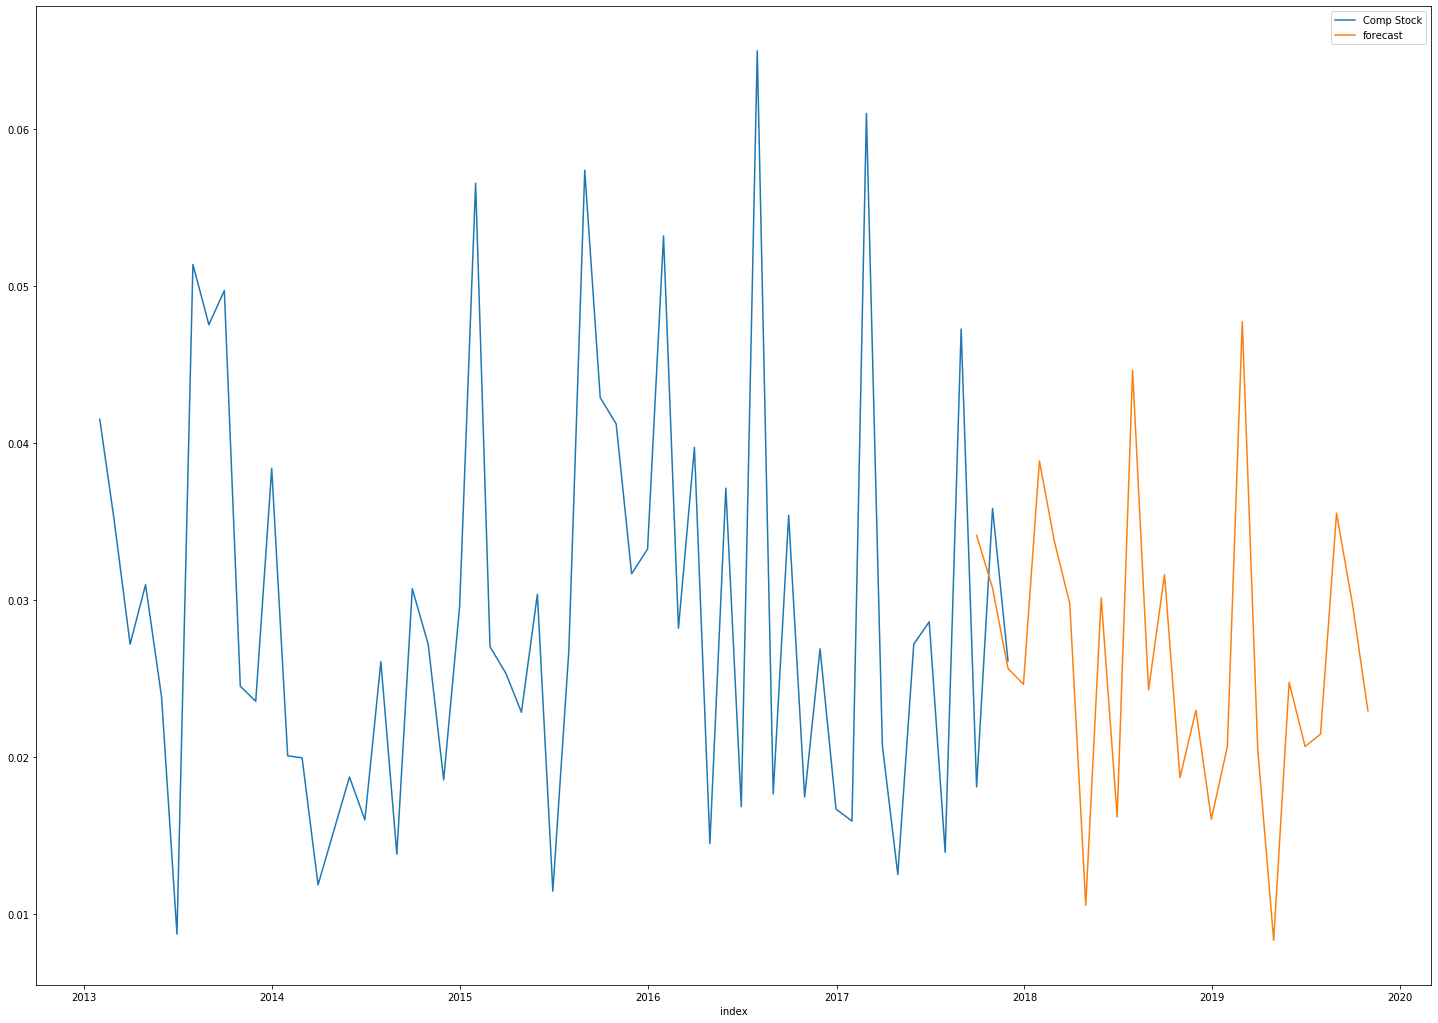

In [60]:
future_df['forecast']=M_results.predict(start=55,end=80,dynamic=True)
future_df[['Comp Stock','forecast']].plot(figsize=(25,18))